In [37]:
# data manipulation
import pandas as pd
import numpy as np
import scipy.io.arff

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# data pre-processing
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [42]:
# carregando o dataset
data, meta = scipy.io.arff.loadarff(f'data/speeddating.arff')
df = pd.DataFrame(data)

# Convertendo byte-strings para strings
str_df = df.select_dtypes([object]).stack().str.decode('utf-8').unstack()
for col in str_df:
    df[col] = str_df[col]

# ajeitar o tipo dos dados
nominal_cols = [col for col, dtype in zip(meta.names(), meta.types()) if dtype == 'nominal']
for col in nominal_cols:
    df[col] = df[col].astype('category')

In [43]:
X = df.drop(columns="match")
y = df["match"]

# pre processamento para conseguir testar as técnicas (não pode ter valores ausentes)
# nem valores categóricos
for col in X.columns:
    if pd.api.types.is_numeric_dtype(X[col]):
        X[col].fillna(X[col].median(), inplace=True)

    elif pd.api.types.is_categorical_dtype(X[col]):
        X[col].fillna(X[col].mode()[0], inplace=True)
        dummies = pd.get_dummies(X[col], prefix=col)
        X.drop(columns=col, inplace=True)
        X = pd.concat([X, dummies], axis=1)

X = StandardScaler().fit_transform(X)

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_1632\3795040819.py:10: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(X[col]):
C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_1632\3795040819.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mode()[0], inplace=True)
C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_1632\3795040819.py:8: FutureWarning: A value is trying to b

## Desbalanceamento das classes

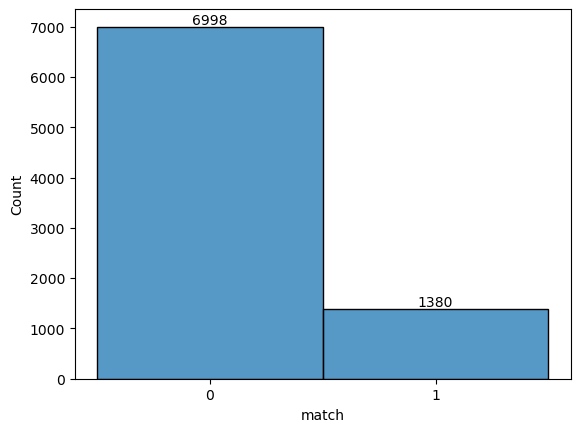

In [44]:
ax = sns.histplot(df['match'])
for container in ax.containers:
    ax.bar_label(container)

plt.show()

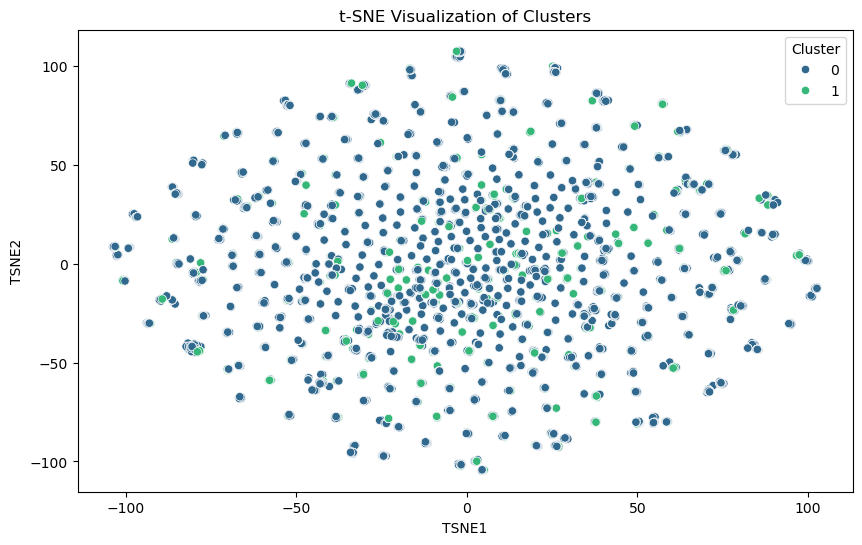

In [45]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_embedded = tsne.fit_transform(X)

# Convert to DataFrame
df_tsne = pd.DataFrame(df_embedded, columns=["TSNE1", "TSNE2"])

df_tsne["Cluster"] = y

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="Cluster", palette="viridis", data=df_tsne)
plt.title("t-SNE Visualization of Clusters")
plt.show()

### Under-Sampling

#### RandomUnderSampling

In [46]:
# RandomUnderSampler da biblioteca imblearn
# a opcao auto 
def us_random(X, y):
    # auto faz resampling de todas as classes, menos a minoritária
    rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
    X_balanced, y_balanced = rus.fit_resample(X, y)
    
    return X_balanced, y_balanced


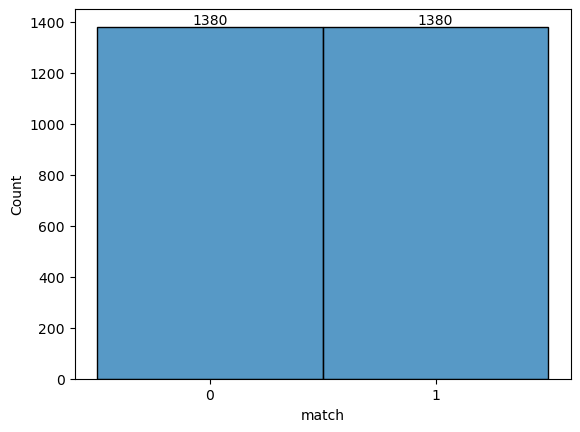

In [47]:
X_balanced, y_balanced = us_random(X, y)

ax = sns.histplot(y_balanced)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

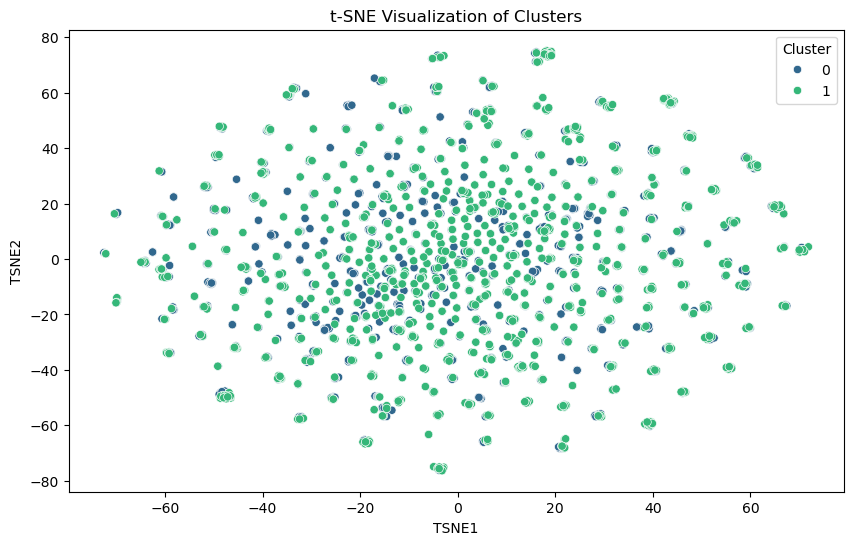

In [48]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_embedded = tsne.fit_transform(X_balanced)

# Convert to DataFrame
df_tsne = pd.DataFrame(df_embedded, columns=["TSNE1", "TSNE2"])

df_tsne["Cluster"] = y_balanced

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="Cluster", palette="viridis", data=df_tsne)
plt.title("t-SNE Visualization of Clusters")
plt.show()

#### Cluster Centroids

In [49]:
def us_cluster_centroids(X, y):
    # auto faz resampling de todas as classes, menos a minoritária
    cc = ClusterCentroids(random_state=42)
    X_balanced, y_balanced = cc.fit_resample(X, y)
    
    return X_balanced, y_balanced

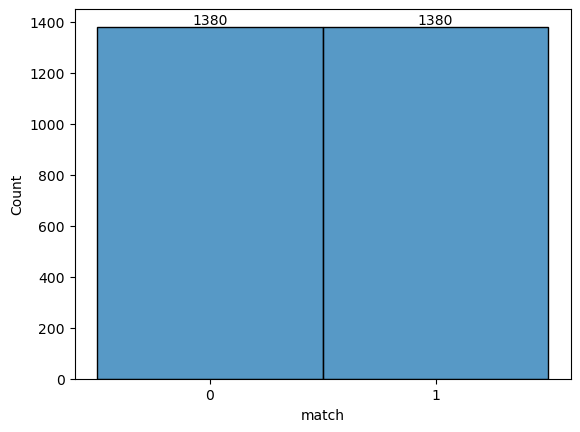

In [50]:
X_balanced, y_balanced = us_cluster_centroids(X, y)

ax = sns.histplot(y_balanced)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

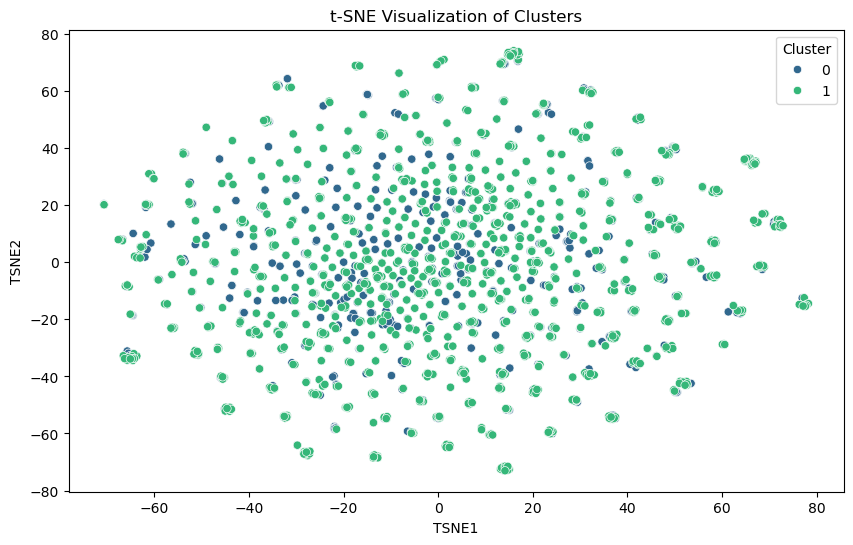

In [51]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_embedded = tsne.fit_transform(X_balanced)

# Convert to DataFrame
df_tsne = pd.DataFrame(df_embedded, columns=["TSNE1", "TSNE2"])

df_tsne["Cluster"] = y_balanced

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="Cluster", palette="viridis", data=df_tsne)
plt.title("t-SNE Visualization of Clusters")
plt.show()

### Over-Sampling

#### RandomOverSampling

In [52]:
def os_random(X, y):
    # auto faz resampling de todas as classes, menos a minoritária
    ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
    X_balanced, y_balanced = ros.fit_resample(X, y)
    
    return X_balanced, y_balanced

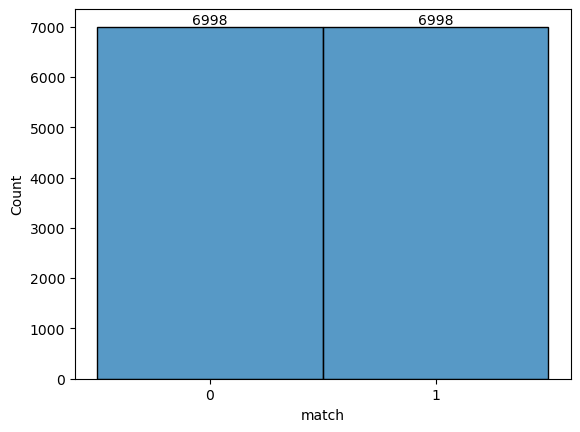

In [53]:
X_balanced, y_balanced = os_random(X, y)

ax = sns.histplot(y_balanced)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

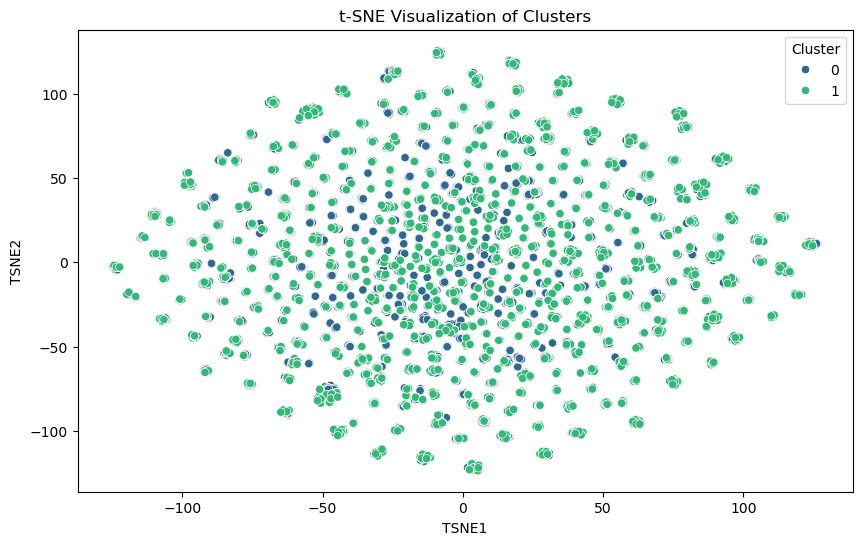

In [54]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_embedded = tsne.fit_transform(X_balanced)

# Convert to DataFrame
df_tsne = pd.DataFrame(df_embedded, columns=["TSNE1", "TSNE2"])

df_tsne["Cluster"] = y_balanced

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="Cluster", palette="viridis", data=df_tsne)
plt.title("t-SNE Visualization of Clusters")
plt.show()

#### OverSampling SMOTE

In [55]:
def os_smote(X, y):
    # auto faz resampling de todas as classes, menos a minoritária
    smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
    X_balanced, y_balanced = smote.fit_resample(X, y)
    
    return X_balanced, y_balanced

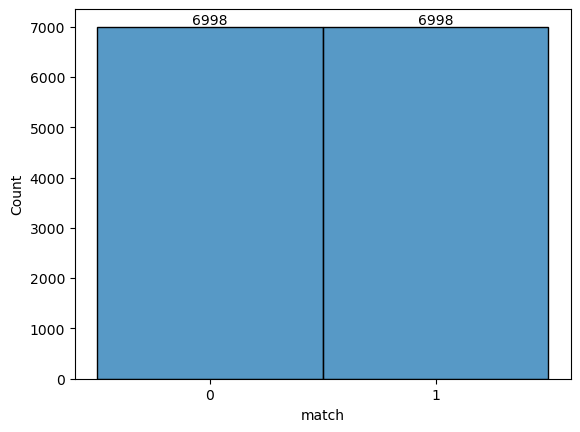

In [56]:
X_balanced, y_balanced = os_smote(X, y)

ax = sns.histplot(y_balanced)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

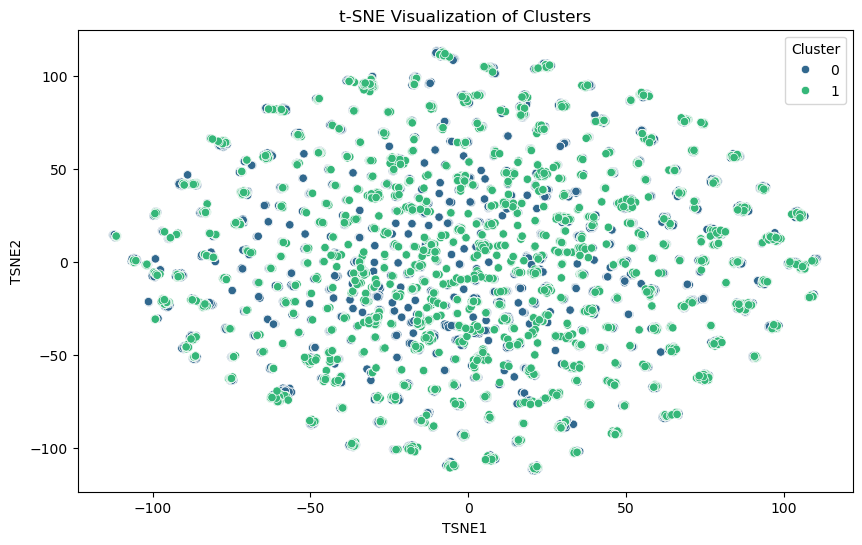

In [57]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_embedded = tsne.fit_transform(X_balanced)

# Convert to DataFrame
df_tsne = pd.DataFrame(df_embedded, columns=["TSNE1", "TSNE2"])

df_tsne["Cluster"] = y_balanced

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="Cluster", palette="viridis", data=df_tsne)
plt.title("t-SNE Visualization of Clusters")
plt.show()

#### OverSampling ADASYN

In [58]:
def os_adasyn(X, y):
    # auto faz resampling de todas as classes, menos a minoritária
    adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)
    X_balanced, y_balanced = adasyn.fit_resample(X, y)
    
    return X_balanced, y_balanced

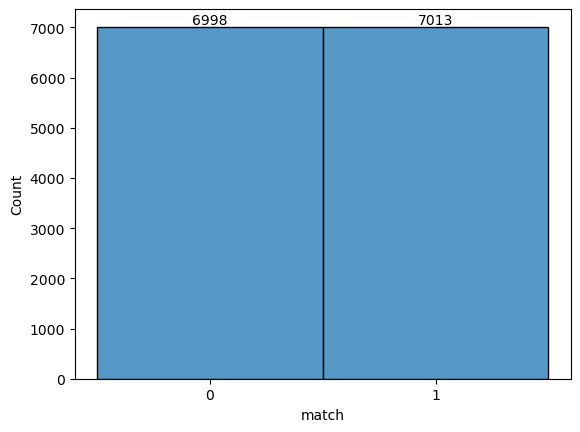

In [59]:
X_balanced, y_balanced = os_adasyn(X, y)

ax = sns.histplot(y_balanced)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

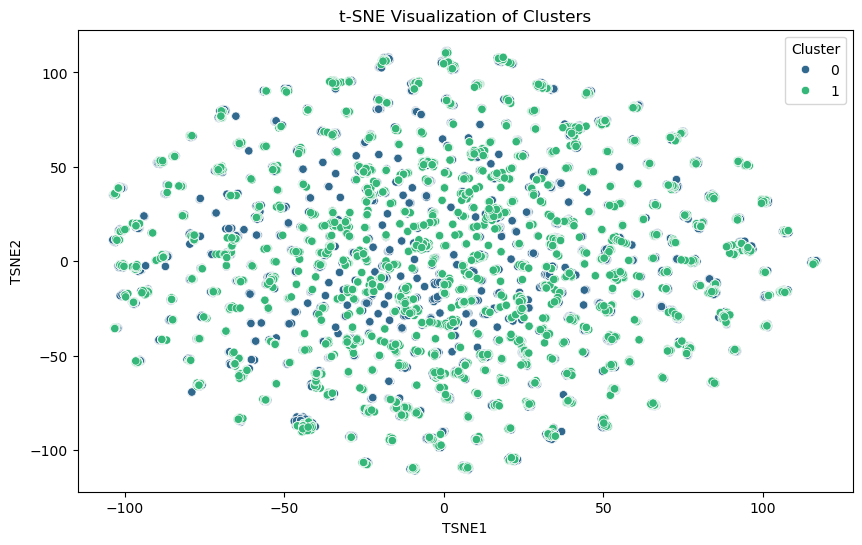

In [60]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_embedded = tsne.fit_transform(X_balanced)

# Convert to DataFrame
df_tsne = pd.DataFrame(df_embedded, columns=["TSNE1", "TSNE2"])

df_tsne["Cluster"] = y_balanced

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="Cluster", palette="viridis", data=df_tsne)
plt.title("t-SNE Visualization of Clusters")
plt.show()

### Modelos que lidam naturalmente com imbalanceamento de dados